- [Data transformation](#Data-transformation)
- [Cross-validation](#Cross-validation)
- [Algorithms](#Algorithms)
- [GridSearch](#GridSearch)
- [Metrics & scores](#Metrics-&-scores)
- [Boosting](#Boosting)
- [Stacking](#Stacking)

## Data transformation
Алгоритм применения трансформации данных:

* построить модель
* вычислить метрику качества
* выполнить преобразования
* снова вычислить метрику качества
* если метрика качества выросла, применить найденную трансформацию ко входным данным перед тем, как подавать на вход модели

### Инженерные приёмы первичной обработки данных

In [10]:
# Логарифмирование
Y = np.array([1, 2, 3, 4])
Y_transformed = np.log(Y)

# Взятие корня
Y = np.array([1, 2, 3, 4])
Y_transformed = np.sqrt(Y)

Оба этих преобразования являются *монотонными*, т.е. они меняют абсолютные значения, но сохраняют порядок величин.

### Standart Scaling (Z-score normalization)

In [13]:
from sklearn.preprocessing import StandardScaler


Y = np.array([1.,  3.,  2.,  4.,  2., 10.,  2.,  5.,  2.,  2.,  1.,  7.,  5.,  2.,  5., 16., 10.,  3., 24.],dtype=np.float32)
Y_transformed = StandardScaler().fit_transform(Y.reshape(-1, 1)).reshape(-1)

Это преобразование позволяет "сгладить" данные, избавить их от выбросов. В результате $z$-трансформации данные сместились в сторону нуля (появились как отрицательные значения, так и положительные), а так же уменьшился масштаб – данные похожи на нормальное (гауссовское) распределение)

### Min-max normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler


Y = np.array([1.,  3.,  2.,  4.,  2., 10.,  2.,  5.,  2.,  2.,  1.,  7.,  5.,  2.,  5., 16., 10.,  3., 24.],dtype=np.float32)
Y_transformed = MinMaxScaler().fit_transform(Y.reshape(-1, 1)).reshape(-1)

Этот метод переносит все точки на отрезок [0;1]
$$
X_{scaled} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

Эта трансформация оцень полезна для визуализации данных – позволяет "ужать" точки в единичный отрезок и компактно отобразить их на графике. Полезна тем, что сохраняет относительные расстояния между точками (т.е. структуру датасета)  
___

## Cross-validation

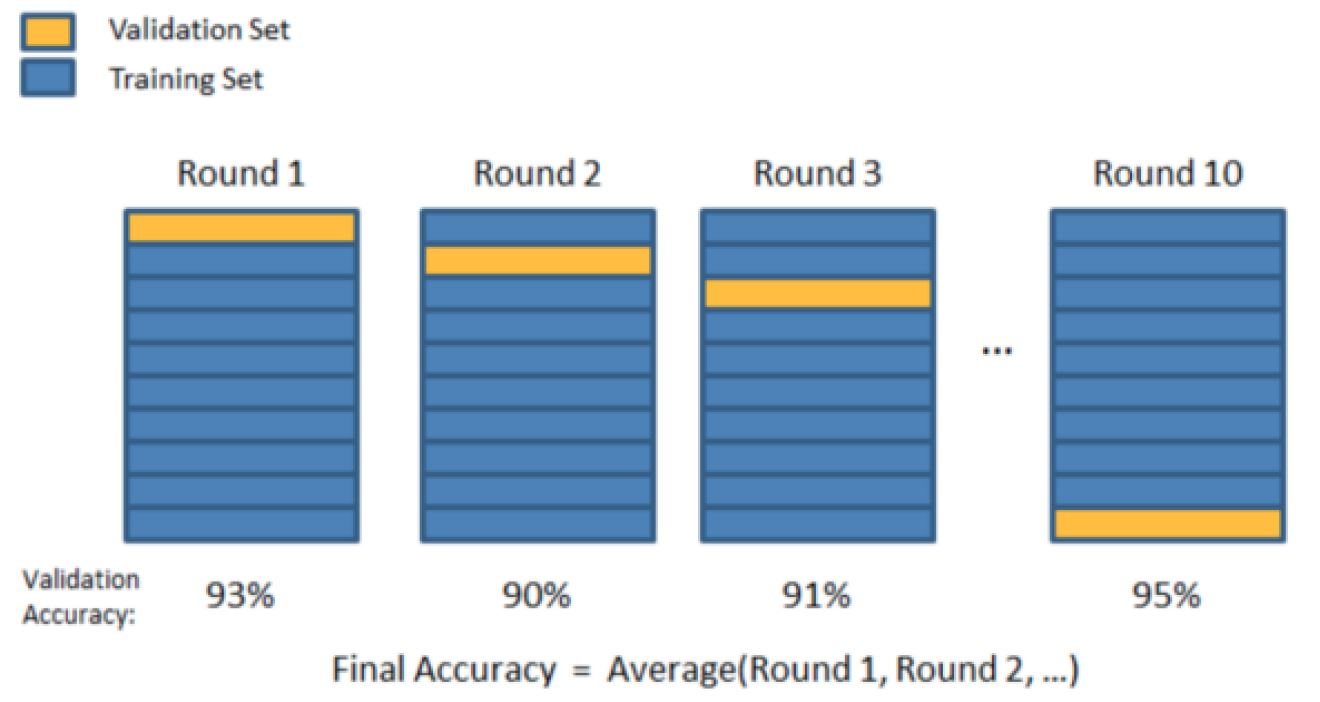

### K-Folds Cross Validation
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [14]:
import numpy as np
from sklearn.model_selection import KFold


X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]]) # create an array
Y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=3) # Define the split - into 2 folds
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=3, random_state=None, shuffle=False)

print(X)
for train_index, test_index in kf.split(X):
    print('TRAIN:\n', X[train_index])
    print('TEST:\n', X[test_index])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
TRAIN:
 [[5 6]
 [7 8]]
TEST:
 [[1 2]
 [3 4]]
TRAIN:
 [[1 2]
 [3 4]
 [7 8]]
TEST:
 [[5 6]]
TRAIN:
 [[1 2]
 [3 4]
 [5 6]]
TEST:
 [[7 8]]


### StratifiedKFold
Здесь разделение на тренировочную и тестовую выборку обусловлено сохранением пропорций между целевыми признаками. (5 нулей и 2 единицы = 5/2)

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold


X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14]]) # create an array
Y = np.array([0, 1, 0, 1, 0, 0, 0]) # Create another array
skf = StratifiedKFold(n_splits=3) # Define the split - into 2 folds
# skf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print('TRAIN:\n', y_train)
    print('TEST:\n', y_test)

TRAIN:
 [1 0 0 0]
TEST:
 [0 1 0]
TRAIN:
 [0 1 0 1 0]
TEST:
 [0 0]
TRAIN:
 [0 1 0 0 0]
TEST:
 [1 0]


C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


### Leave One Out Cross Validation (LOOCV)
In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold.

In [3]:
from sklearn.model_selection import LeaveOneOut


X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
Y = np.array([10, 21, 30, 41, 50, 61])
loo = LeaveOneOut()
loo.get_n_splits(X)

print(X)
for train_index, test_index in loo.split(X):
    print("TRAIN:\n", X[train_index])
    print("TEST:\n", X[test_index])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
TRAIN:
 [[ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
TEST:
 [[1 2]]
TRAIN:
 [[ 1  2]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
TEST:
 [[3 4]]
TRAIN:
 [[ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]
 [11 12]]
TEST:
 [[5 6]]
TRAIN:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 9 10]
 [11 12]]
TEST:
 [[7 8]]
TRAIN:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [11 12]]
TEST:
 [[ 9 10]]
TRAIN:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
TEST:
 [[11 12]]


Accuracy score on each iterations

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


LR = LinearRegression()
print(cross_val_score(LR, X, Y, cv=3))

[0.98280992 0.99267923 0.98280992]


Fit on all dataset by cross-validation's rules and predict themselfe

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


predictions = cross_val_predict(LR, X, Y, cv=3)
print(cross_validate(LR, X, Y, cv=3))

{'fit_time': array([0.00100255, 0.00100064, 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([0.98280992, 0.99267923, 0.98280992])}


___

## Algorithms

### Clasifiers

In [1]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier # не так все просто!

from sklearn.multioutput import ClassifierChain, MultiOutputClassifier, ABCMeta # не так все просто!
from sklearn.multiclass import OutputCodeClassifier, OneVsOneClassifier, OneVsRestClassifier # не так все просто!

from sklearn.gaussian_process.gpc import GaussianProcessClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier #!
from sklearn.ensemble import IsolationForest, RandomForestClassifier, RandomTreesEmbedding # не так все просто!

from sklearn.ensemble import BaggingClassifier, StackingClassifier

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

from sklearn.calibration import CalibratedClassifierCV

from sklearn.semi_supervised import LabelPropagation, LabelSpreading

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, ARDRegression, BayesianRidge, GammaRegressor #!
from sklearn.linear_model import LassoLarsIC, Hinge, Huber, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV
from sklearn.linear_model import ElasticNet, ElasticNetCV, MultiTaskElasticNet, MultiTaskElasticNetCV, MultiTaskLasso, MultiTaskLassoCV
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, PassiveAggressiveClassifier, Perceptron
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier, RidgeClassifierCV, SGDClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble import StackingClassifier

C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.gaussian_process.gpc module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.gaussian_process. Anything that cannot be imported from sklearn.gaussian_process is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Kirill\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of

___

## GridSearch

In [ ]:
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


skf = StratifiedKFold(n_splits=5, random_state=17)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=17)

'''Базовые алгоритмы'''
gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)
svc = SVC(random_state=17)
lr = LogisticRegression(random_state=17)

'''Параметры базовых алгоритмов'''
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier
rfc_params = {'n_estimators': range(10, 100, 10), 'min_samples_leaf': range(1, 5)} # RandomForestClassifier
svc_params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.1, 1, 0.2)} # SVC
lr_params = {'C': np.arange(0.5, 1, 0.1)}

'''Создание GridSearch объектов алгоритмов'''
gbc_GS = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)
rfc_GS = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf)
svc_GS = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf)
lr_GS = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf)

models = [gbc, rfc, svc, lr]
models_names = ['gbc', 'rfc', 'svc', 'lr']
models_params = [gbc_params, rfc_params, svc_params, lr_params]
best_params = {}

for n, (model, model_params, model_name) in enumerate(zip(models, models_params, models_names)):
    '''создание GridSearch estimator'a на основе базового алгоритма, заданных промежутков параметров и стратифицированной кросс-валидации'''
    GS_estimator = GridSearchCV(estimator=model, param_grid=model_params, cv=skf)
    # GS estimator автоматически рефитится (refit=True)

    '''обучение GS estimator'а на тренировочных данных и нахождение наилучших параметров'''
    GS_model = GS_estimator.fit(x_train, y_train)

    '''предсказание обученной модели'''
    y_validate_pred = GS_model.predict(x_validate)

    '''словарь наилучших параметров'''
    best_params[model_name] = GS_model.best_params_

___

## Metrics & scores

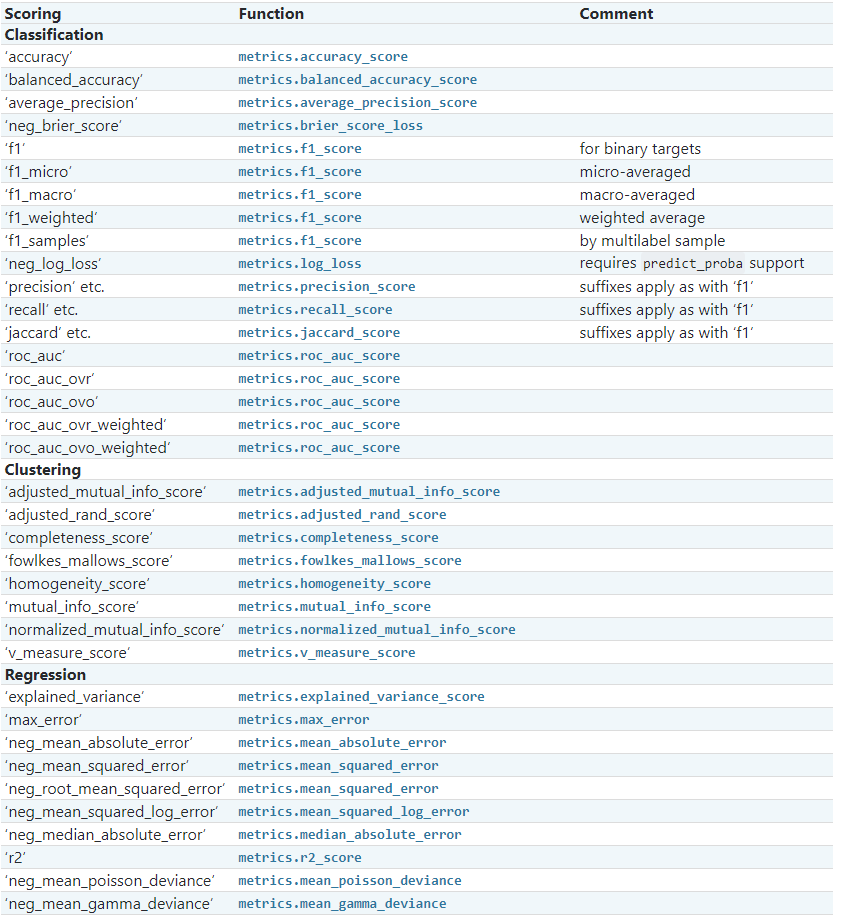

### Accuracy
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.

In [23]:
# важно! Сначала идет валидационная выборка, а только потом предсказанная
from sklearn.metrics import accuracy_score


y_test = [0, 1, 2, 3]
y_pred = [0, 2, 1, 3]

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))

0.5
2


### Precision
he precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.  
When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

In [27]:
from sklearn.metrics import precision_score


y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

print(precision_score(y_true, y_pred, average='macro'))
print(precision_score(y_true, y_pred, average='micro'))
print(precision_score(y_true, y_pred, average='weighted'))
print(precision_score(y_true, y_pred, average=None))

y_pred = [0, 0, 0, 0, 0, 0]

print(precision_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None, zero_division=1))

0.2222222222222222
0.3333333333333333
0.2222222222222222
[0.66666667 0.         0.        ]
[0.33333333 0.         0.        ]
[0.33333333 1.         1.        ]


### Recall
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [28]:
from sklearn.metrics import recall_score


y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

print(recall_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='micro'))
print(recall_score(y_true, y_pred, average='weighted'))
print(recall_score(y_true, y_pred, average=None))

y_true = [0, 0, 0, 0, 0, 0]
print(recall_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None, zero_division=1))

0.3333333333333333
0.3333333333333333
0.3333333333333333
[1. 0. 0.]
[0.5 0.  0. ]
[0.5 1.  1. ]


C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Mean absolute error

Для оценки качества **регрессии** можно использовать среднюю абсолютную ошибку

In [20]:
from sklearn.metrics import mean_absolute_error

y_predict = [1.1, 2.1, 2.9]
y_test = [1, 2, 3]
print("MAE = %s" % mean_absolute_error(y_test, y_predict)) # сначала валидационная выборка затем предсказанная

MAE = 0.10000000000000009


*Mean Absolute Error* - это просто сумма отклонений истинных значений $y$ от предсказаний нашей модели:

$$
\text{absolute error} = |y_1 - \hat{y}_1| + |y_2 - \hat{y}_2| + \ldots
$$

А потом мы эту сумму делим на количество точек - получаем среднюю ошибку

Метрика принимает только положительные значения! Чем ближе к нулю, тем лучше модель.

### MSE

Mean Squared Error (MSE) - это базовая метрика для определения качества линейной регрессии

In [21]:
from sklearn.metrics import mean_squared_error


print('MSE = %s' % mean_squared_error(y_test, y_predict))

MSE = 0.010000000000000018


Для каждого предсказанного значения $\hat{y}_i$ мы считаем квадрат отклонения от фактического значения и считаем среднее по полученным величинам.  
В целом логика та же, что в *MAE*, только усреднять мы будем квадраты ошибок 
$$
\text{absolute error} = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots
$$

Эта метрика тоже принимает только положительные значения! Чем ближе к нулю, тем лучше модель.

### $R^2$ (коэффициент детерминации)
Название - калька английского термина *coefficient of determination*. Наилучшее возможное значение 1.0, чем меньше тем хуже. Если этот коэффициент близок к 1, то условная дисперсия модели (то есть разброс предсказаний модели $\hat{y}$ относительно разброса самой целевой переменной $y$ ) достаточно мала - то есть модель неплохо описывает данные. Коэффициент может быть даже отрицательным - то это значит, что модель совсем уж плохая.  
Эта метрика хороша тем, что она *нормализована*, то есть не превышает единицу - удобно сравнивать разные модели.

In [22]:
from sklearn.metrics import r2_score


print("r2_score = %s" % r2_score(y_test, y_predict))

r2_score = 0.985


### Confusion matrix

In [89]:
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [90]:
df = pd.read_csv('9.7_titanic.csv')
features = df.drop(columns='Survived')
target = df.Survived
x_train, x_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=0)

In [91]:
DTC = DecisionTreeClassifier(random_state=0)
DTC_model = DTC.fit(x_train, y_train)
y_pred = DTC_model.predict(x_test)

In [92]:
confusion_matrix(y_test, y_pred) # важно! Сначала идет валидационная выборка, а только потом предсказанная

array([[93, 17],
       [24, 45]], dtype=int64)

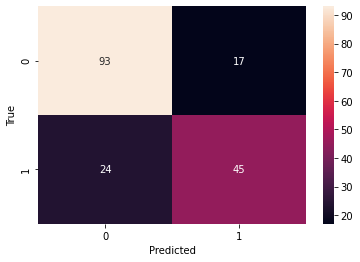

In [93]:
df = pd.DataFrame({'True':y_test, 'Predicted':y_pred}, columns=['True','Predicted'])

confusion_matrix_df = pd.crosstab(df['True'], df['Predicted'], rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_df, annot=True)
plt.show()

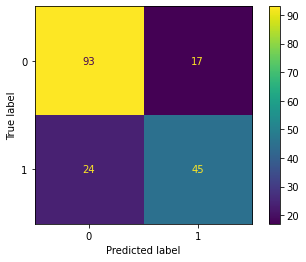

In [95]:
plot_confusion_matrix(DTC_model, x_test, y_test)
plt.show()

___

## Boosting

### XGboost

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score

In [44]:
df = pd.read_csv('9.7_titanic.csv')
features = df.drop(columns='Survived')
target = df.Survived
x_train, x_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=0)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [45]:
%%time
'''Оригинальный способ обучения и предсказания библиотеки XGBoost'''

params = {
'max_depth':3, # глубина дерева
'min_child_weight':10,
'learning_rate':0.3, # step size shrinkage used to prevent overfitting. Range is [0,1]
'subsample':0.5, # percentage of samples used per tree. Low value can lead to underfitting
'colsample_bytree':0.6,
'objective': 'binary:logistic',
'eta':0.3 # коэффициент градиента (когда градиент вычитают из предуыдущих весов)
}

XGB_model = xgb.train(params, dtrain, num_boost_round=2) # кол-во этапов бустинга, на которых создаются следующие estimator'ы
y_pred_proba = XGB_model.predict(dtest) # возвращает список вероятностей, что будет "1"
y_pred = [1 if i > 0.5 else 0 for i in y_pred_proba] # необходимо выбрать степень "уверенности" в ответе самому
(accuracy_score(y_pred_skl, y_test), recall_score(y_pred_skl, y_test), precision_score(y_pred_skl, y_test))

Wall time: 6.99 ms


(0.8268156424581006, 0.8653846153846154, 0.6521739130434783)

In [52]:
%%time
'''Способ обучения и предсказания в стилистике и API sklearn'''

max_depth = 3  # глубина дерева
min_child_weight = 10
learning_rate = 0.3 # step size shrinkage used to prevent overfitting. Range is [0,1]
subsample = 0.5 # percentage of samples used per tree. Low value can lead to underfitting
colsample_bytree = 0.6
objective = 'binary:logistic'
eta = 0.3 # коэффициент градиента (когда градиент вычитают из предуыдущих весов)
num_estimators = 2 # тоже самое, что и num_boost_round=2, но в данном случае считаются estimator'ы,
                   # а не этапы бустинга, на которых они создаются 
XGB_skl = xgb.XGBClassifier(max_depth=max_depth,
                            min_child_weight=min_child_weight,
                            learning_rate=learning_rate,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree,
                            objective=objective,
                            eta=eta,
                            n_estimators=num_estimators)

XGB_skl_model = XGB_skl.fit(x_train, y_train)
y_pred_skl = XGB_skl_model.predict(x_test) # возвращает метки класса элементы которой при вероятности > 0.5 равны True,
                                           # а при вероятности <= 0.5 равны False
y_pred_skl_proba = XGB_skl_model.predict(x_test)  # возвращает массив кортежей - (вероятность '0'), (вероятность '1')
(accuracy_score(y_pred_skl, y_test), recall_score(y_pred_skl, y_test), precision_score(y_pred_skl, y_test))

Wall time: 11 ms


(0.8268156424581006, 0.8653846153846154, 0.6521739130434783)

In [51]:
'''Можно посмотреть ошибку на каждом бустинге'''
evals = ((dtest, 'test'), (dtrain, 'train')) # добавим это в кач-ве параметра в метод train

params = {
'max_depth':3, # глубина дерева
'min_child_weight':10,
'learning_rate':0.3, # step size shrinkage used to prevent overfitting. Range is [0,1]
'subsample':0.5, # percentage of samples used per tree. Low value can lead to underfitting
'colsample_bytree':0.6,
'objective': 'binary:logistic',
'eta':0.3 # коэффициент градиента (когда градиент вычитают из предуыдущих весов)
}

XGB_model = xgb.train(params, dtrain, num_boost_round=10, evals=evals)
y_pred_proba = XGB_model.predict(dtest)
y_pred = [1 if i > 0.5 else 0 for i in y_pred_proba]
(accuracy_score(y_pred_skl, y_test), recall_score(y_pred_skl, y_test), precision_score(y_pred_skl, y_test))

[0]	test-error:0.21229	train-error:0.21348
[1]	test-error:0.17318	train-error:0.19944
[2]	test-error:0.22905	train-error:0.22472
[3]	test-error:0.22346	train-error:0.22753
[4]	test-error:0.24022	train-error:0.23034
[5]	test-error:0.19553	train-error:0.20646
[6]	test-error:0.18994	train-error:0.20365
[7]	test-error:0.19553	train-error:0.20927
[8]	test-error:0.18994	train-error:0.20365
[9]	test-error:0.19553	train-error:0.19523


(0.8268156424581006, 0.8653846153846154, 0.6521739130434783)

В качестве метрики оценки важности признаков в XGBoost используется **F-score**, которая вычисляется на основе того, как часто делалось разбиение по данному признаку.  
По полученным данным можно посмотреть, какие признаки являются излишними и их можно убрать, а какие наиболее важны при обучении модели, т.е. используются чаще всего.

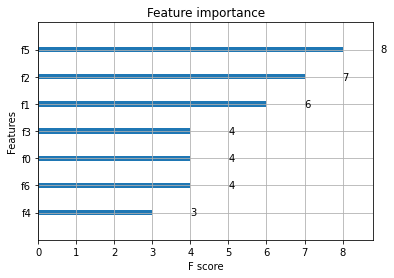

In [48]:
xgb.plot_importance(XGB_model)

___

## Stacking

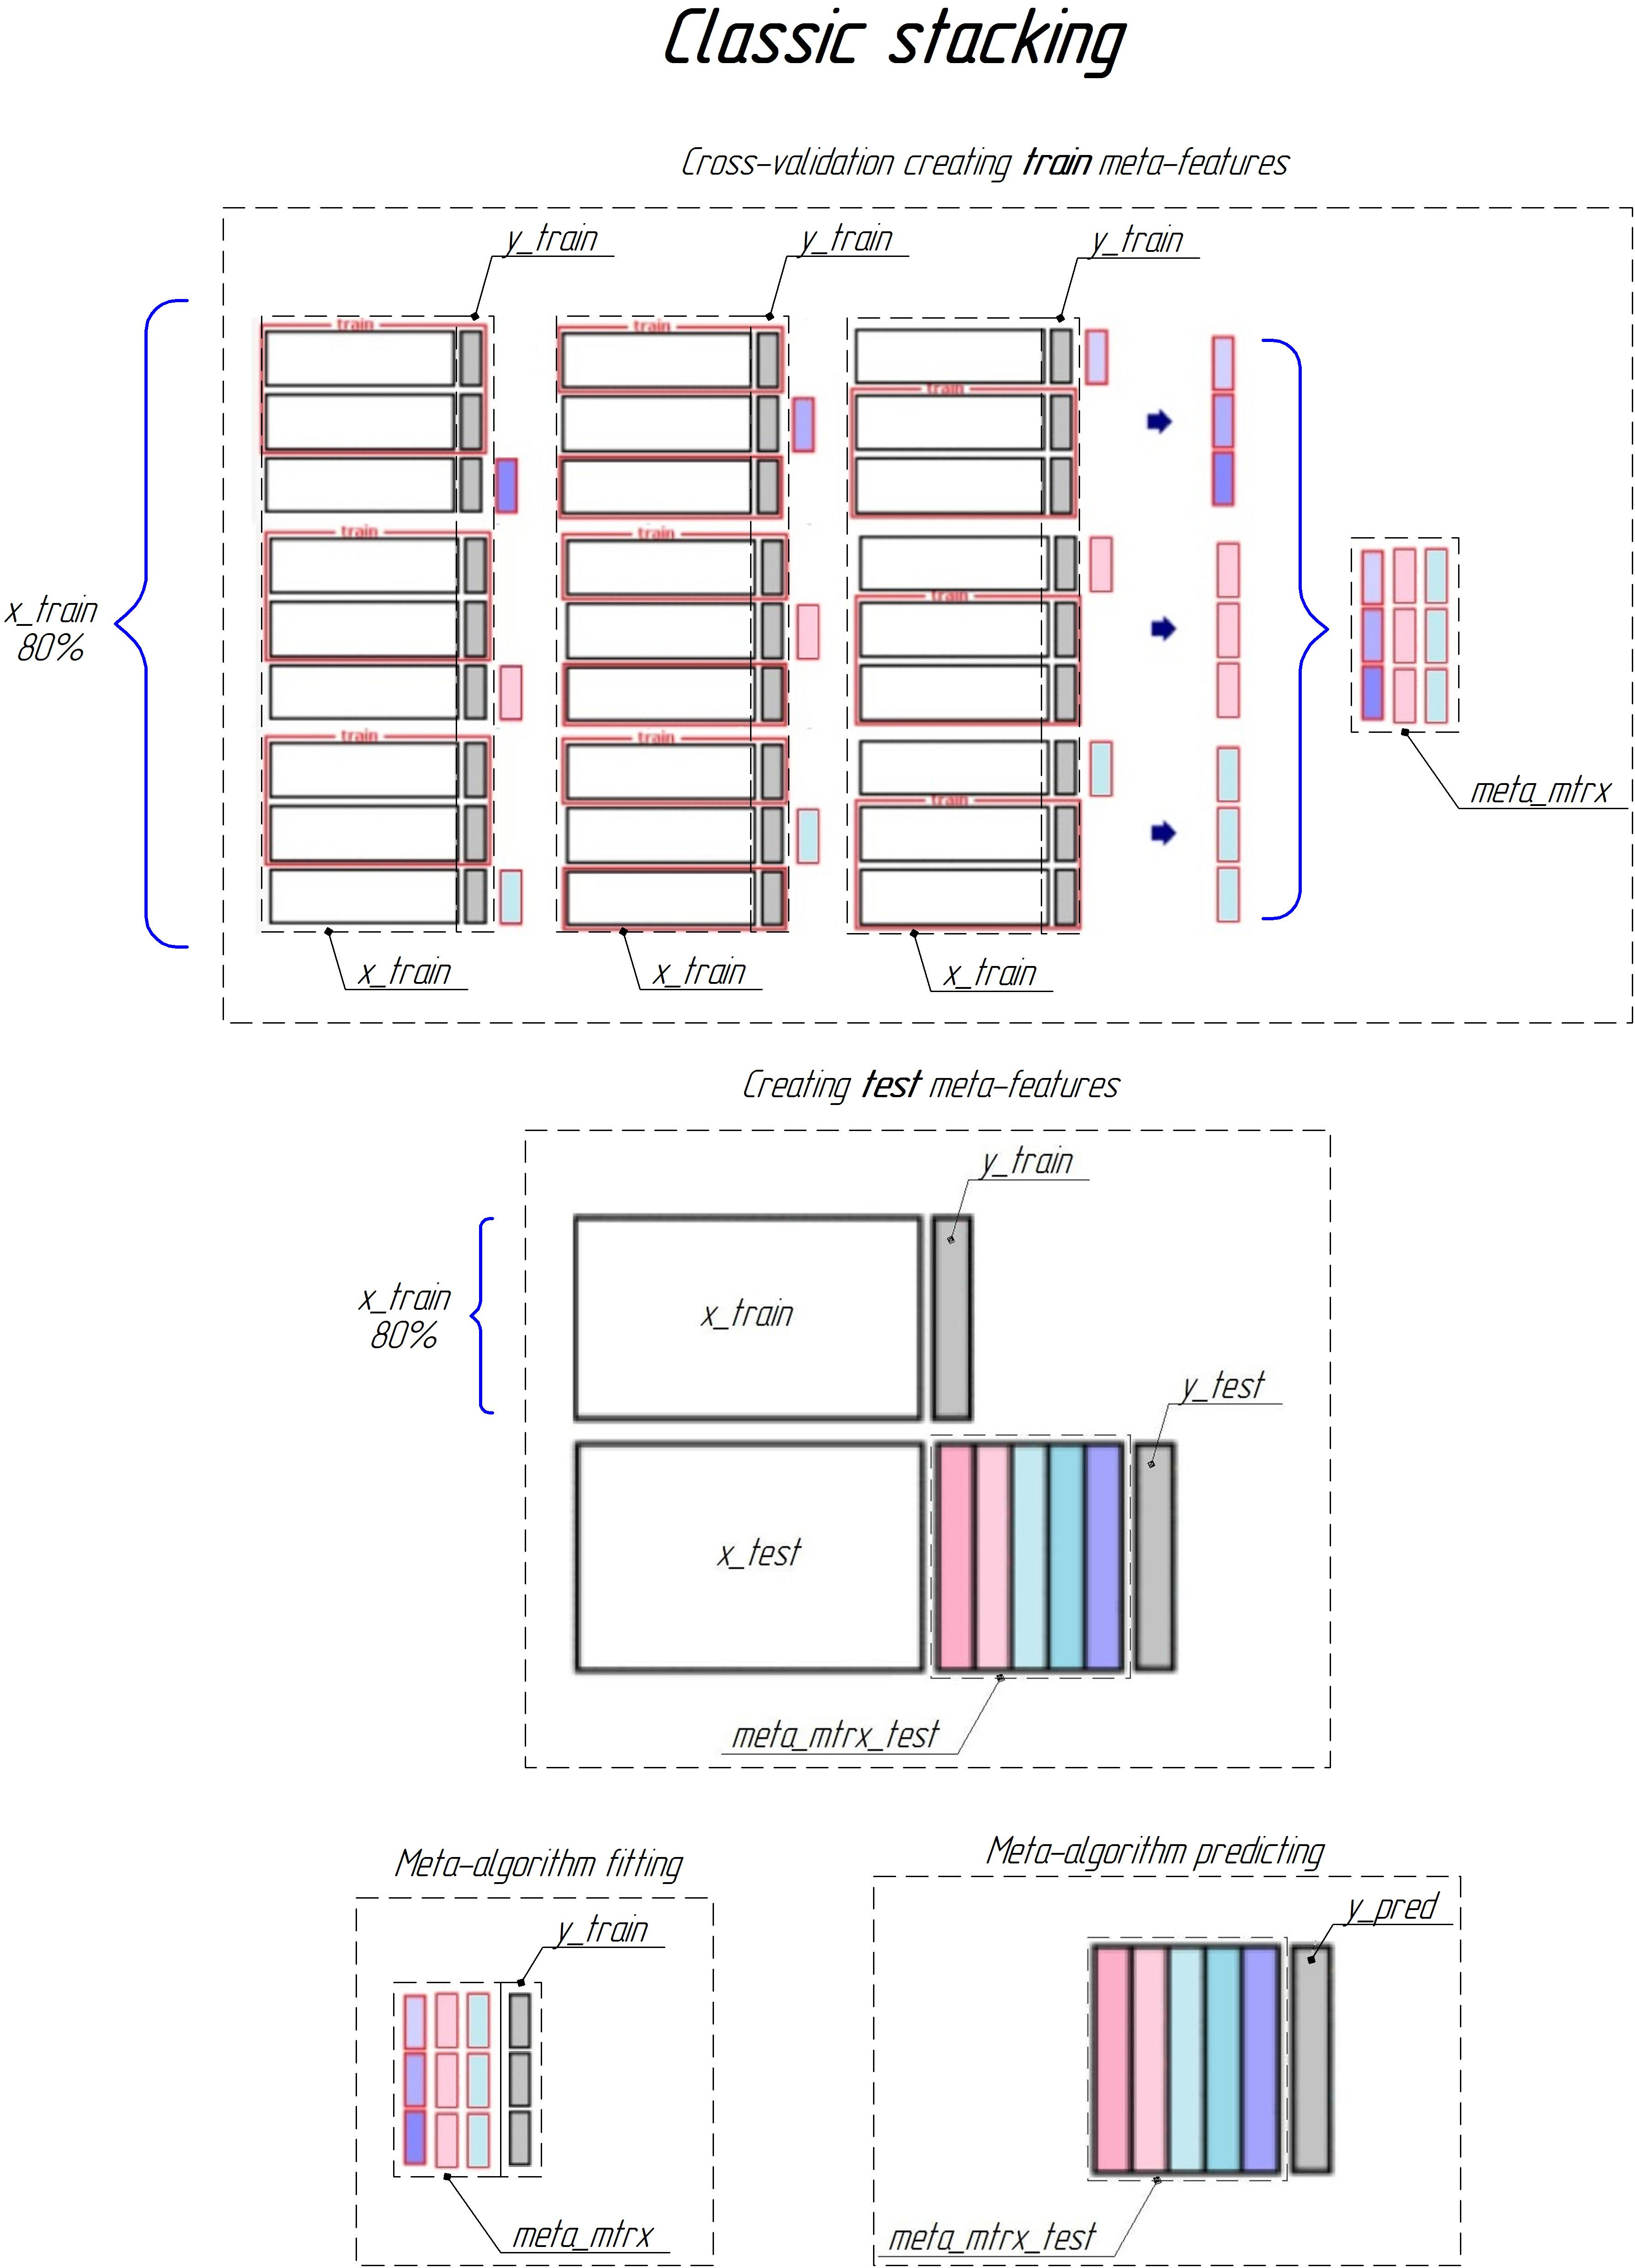

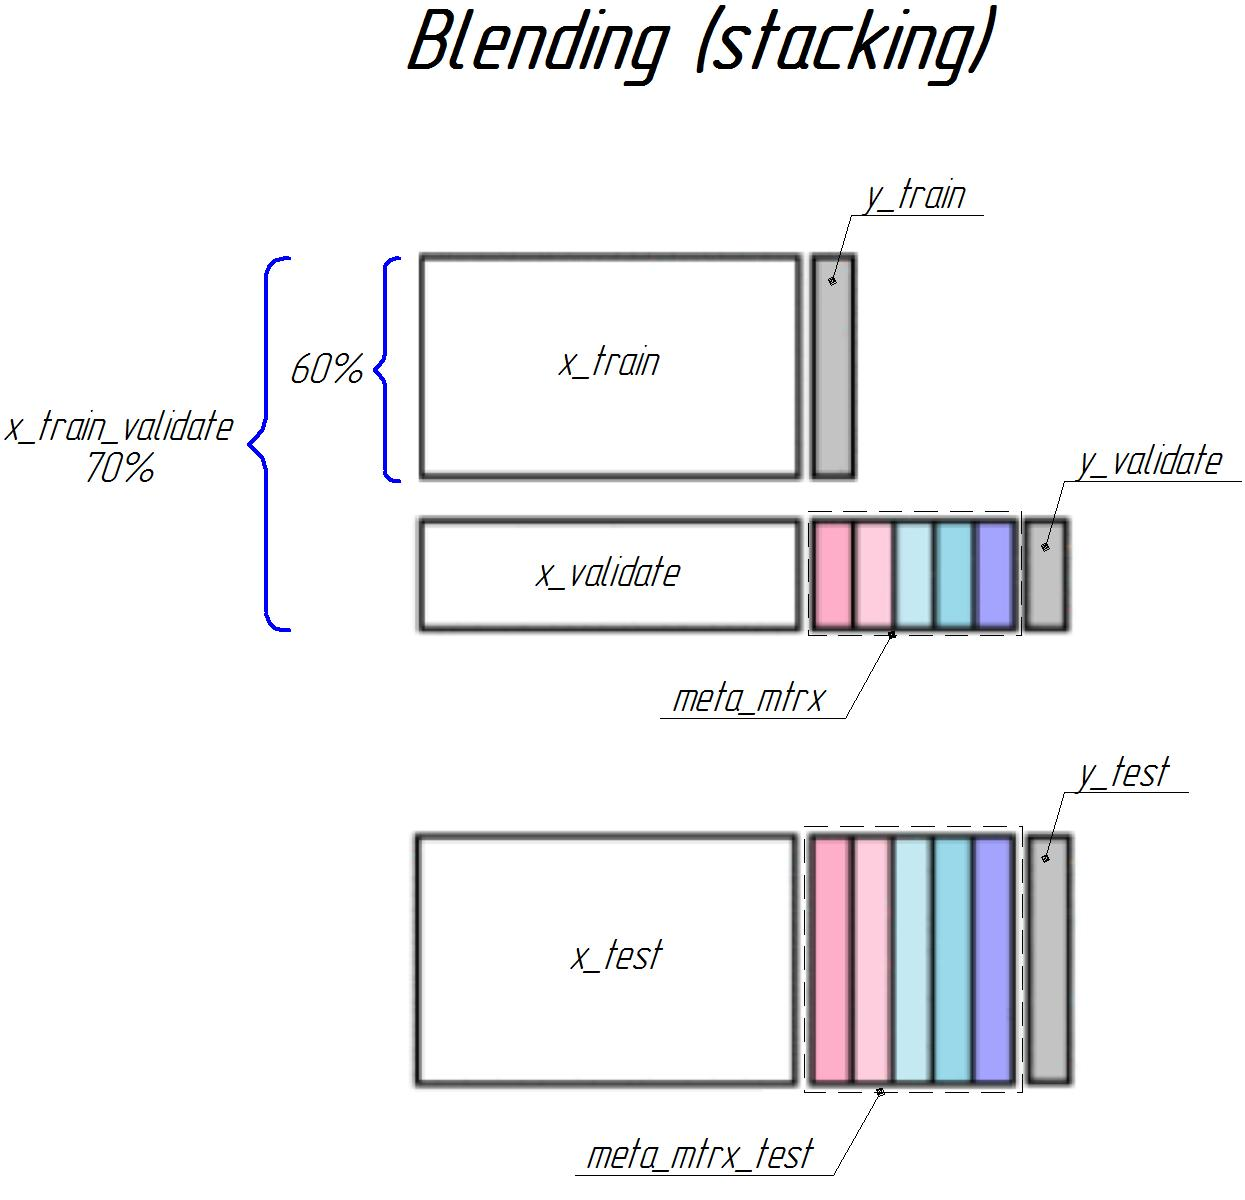

In [38]:
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


def stacking_blending(models, meta_alg, data_train, data_test, targets_train, targets_test=None, test_size=None, cv=5):
    if test_size is None:
        meta_mtrx = np.empty((len(data_train), len(models)))
        meta_mtrx_test = np.empty((len(data_test), len(models)))
        for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=cv, method='predict')
            meta_mtrx_test[:, n] = model.fit(data_train, targets_train).predict(data_test)

        meta_alg.fit(meta_mtrx, targets_train) # обучение мета-алгоритма на обучающей матрице суперпризнаков
        prediction = meta_alg.predict(meta_mtrx_test) # предсказание мета-алгоритма тестовой части датасета
        return prediction

    elif test_size > 0 and test_size < 1:
        data_train_train, data_train_valid, targets_train_train, targets_train_valid =\
        train_test_split(data_train, targets_train, test_size=test_size)

        meta_mtrx = np.empty((len(data_train_valid), len(models))) # создание заготовки обучающей матрицы суперпризнаков
        meta_mtrx_test = np.empty((len(data_test), len(models))) # создание заготовки тестовой матрицы суперпризнаков

        for n, model in enumerate(models):
            model.fit(data_train_train, targets_train_train) # обучение базовых алгоритмов на тренировочной части тренировочного датасета
            meta_mtrx[:, n] = model.predict(data_train_valid) # заполнение обучающей мета-алгоритм матрицы суперпризнаков
            meta_mtrx_test[:, n] = model.predict(data_test) # заполнение тестовой матрицы суперпризнаков

        meta_alg.fit(meta_mtrx, targets_train_valid) # обучение мета-алгоритма на обучающей матрице суперпризнаков
        prediction = meta_alg.predict(meta_mtrx_test) # предсказание мета-алгоритма тестовой части датасета
        return prediction
    
    else:
        raise ValueError("test_size must be between 0 and 1")

    if targets_test:
        print('roc_auc_score:', roc_auc_score(targets_test, prediction))
        print(prediction)


titanic = pd.read_csv('9.7_titanic.csv')
targets = titanic.Survived
data = titanic.drop(columns='Survived')
x_train, x_test, y_train, y_test = train_test_split(data, targets, train_size=0.8, random_state=17)

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(random_state=17)
svc = SVC(random_state=17)
meta = xgb.XGBClassifier(n_estimators=40)

models = [knn, lr, svc]

'''Blending'''
stacking_blending(models, meta, x_train, x_test, y_train, y_test, test_size=0.3, cv=5)
'''Classic stacking'''
stacking_blending(models, meta, x_train, x_test, y_train, y_test, test_size=None, cv=5)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)